In [1]:
import requests
from bs4 import BeautifulSoup
from io import BytesIO
from PIL import Image
import re
import os

movie_ranking = requests.get("https://www.moviechart.co.kr/rank/realtime/index/image")

image_dir = 'images'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
    
pattern = r'[\\/:"*?<>|]'

if movie_ranking.status_code == 200:
    print("영화 정보를 출력합니다.")
    soup = BeautifulSoup(movie_ranking.content, 'html.parser')
    title_list = soup.select(".movieBox-list .movie-title a")
    image_list = soup.select(".movieBox-list .movieBox-item img")
    print(f"수집한 영화 수: {len(title_list)}")
    for title, image in zip(title_list, image_list):
        image_src = image.get('src')
        image_response = requests.get("https://www.moviechart.co.kr" + image_src)
        img = Image.open(BytesIO(image_response.content))
        image_filename = re.sub(pattern, '', title.text)
        img.save(os.path.join(image_dir, image_filename + ".png"))
        print(title.text, )
else:
    print("페이지에 연결할 수 없습니다.")

영화 정보를 출력합니다.
수집한 영화 수: 20
좀비딸
F1 더 무비
전지적 독자 시점
킹 오브 킹스
판타스틱 4: 새로운 출발
악마가 이사왔다
명탐정 코난: 척안의 잔상
발레리나
배드 가이즈 2
베베핀 극장판: 사라진 베베핀과 핑크퐁 대모험
쥬라기 월드: 새로운 시작
노이즈
콘스탄틴
극장판 도라에몽: 진구의 그림이야기
꼬마마법사 주니토니
고고다이노 극장판: 게코도마뱀의 꿈
슈퍼맨
미세리코르디아
강령: 귀신놀이
추적


이미지 주소    
#content > div.wArea.space > div.movieBox > ul > li:nth-child(1) > a > img

In [2]:
import requests
from bs4 import BeautifulSoup
from io import BytesIO
from PIL import Image
import re
import os

movie_ranking = requests.get("https://www.moviechart.co.kr/rank/realtime/index/image")
soup = BeautifulSoup(movie_ranking.content, 'html.parser')

image_list = soup.select(".movieBox-list .movieBox-item img")

print(image_list)

[<img alt="좀비딸" src="/thumb?width=178&amp;height=267&amp;m_code=20241941&amp;source=https://admin.moviechart.co.kr/assets/upload/movie/250711065608_8061.jpg"/>, <img alt="F1 더 무비" src="/thumb?width=178&amp;height=267&amp;m_code=20254501&amp;source=https://admin.moviechart.co.kr/assets/upload/movie/250701060008_4891.jpg"/>, <img alt="전지적 독자 시점" src="/thumb?width=178&amp;height=267&amp;m_code=20233227&amp;source=https://admin.moviechart.co.kr/assets/upload/movie/250711063646_2355.jpg"/>, <img alt="킹 오브 킹스" src="/thumb?width=178&amp;height=267&amp;m_code=20254275&amp;source=https://admin.moviechart.co.kr/assets/upload/movie/250701060125_4823.jpg"/>, <img alt="판타스틱 4: 새로운 출발" src="/thumb?width=178&amp;height=267&amp;m_code=20252552&amp;source=https://admin.moviechart.co.kr/assets/upload/movie/250717071312_1985.jpg"/>, <img alt="악마가 이사왔다" src="/thumb?width=178&amp;height=267&amp;m_code=20210546&amp;source=https://admin.moviechart.co.kr/assets/upload/movie/250723015135_8111.jpg"/>, <img alt=

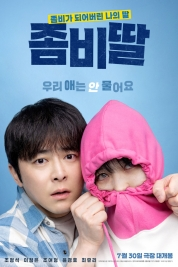

In [3]:
image_src = image_list[0].get('src')
image_response = requests.get("https://www.moviechart.co.kr" + image_src)

img = Image.open(BytesIO(image_response.content))

img